In [1]:
%pylab inline
import sys
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from hits import AllHits
hits = AllHits('../data/signal_TDR.root')

### Determine the maximum and minimum signal hit times

In [3]:
min_sig_hit_time = 10000000000000
max_sig_hit_time = -1000000000000
for evt in range(hits.n_events):
    hit_times = hits.get_measurement(evt, "CdcCell_t")
    sig_wires = hits.get_sig_wires(evt)
    this_time = min(hit_times[sig_wires])
    if this_time < min_sig_hit_time:
        min_sig_hit_time = this_time
    this_time = max(hit_times[sig_wires])
    if this_time > max_sig_hit_time:
        max_sig_hit_time = this_time
print "Minimum hit time of signal hit w.r.t. proton bunch fire = {}".format(min_sig_hit_time)
print "Maximum hit time of signal hit w.r.t. proton bunch fire = {}".format(max_sig_hit_time)

Minimum hit time of signal hit w.r.t. proton bunch fire = -30.8928143468
Maximum hit time of signal hit w.r.t. proton bunch fire = 1169.48608539


### Plot the distributions

In [4]:
sig_time = np.zeros(0)
bkg_time = np.zeros(0)
for evt in range(hits.n_events):
    hit_times = hits.get_measurement(evt, "CdcCell_t")
    trig_times = hits.get_trigger_time(evt)
    sig_wires = hits.get_sig_wires(evt)
    bkg_wires = hits.get_bkg_wires(evt)
    sig_time = np.append(sig_time, (hit_times[sig_wires]%1170-hits.get_trigger_time(evt)[sig_wires])%1170)
    bkg_time = np.append(bkg_time, (hit_times[bkg_wires]%1170-hits.get_trigger_time(evt)[bkg_wires])%1170)

### Distibution of signal hits timing with resepct to trigger timing

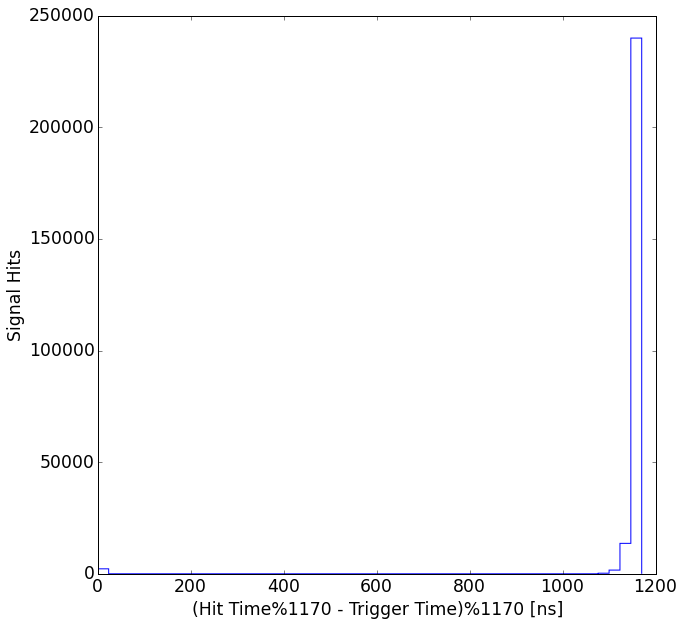

In [7]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('(Hit Time%1170 - Trigger Time)%1170 [ns]' , fontsize='xx-large')
plt.ylabel('Signal Hits', fontsize='xx-large')
plt.hist(sig_time,bins=50,histtype='step')
show()

### Distribution of background hit timing with resepct to trigger hit

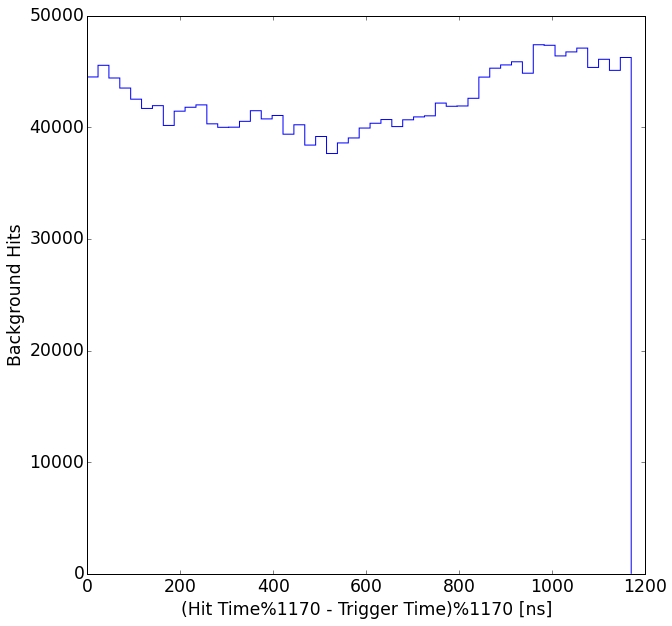

In [6]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('(Hit Time%1170 - Trigger Time)%1170 [ns]' , fontsize='xx-large')
plt.ylabel('Background Hits', fontsize='xx-large')
plt.hist(bkg_time,bins=50,histtype='step')
show()